# BAGGING CLASSIFIER

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score

In [29]:
# Data

df = pd.read_csv("retail_churn_data.csv")

X = df.drop(columns=["Churn", "Customer_ID"])
y = df["Churn"]

# Stratified split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.35, stratify=y, random_state=42
)

# Base model
base_tree = DecisionTreeClassifier(random_state=42)

# Bagging
bagging_model = BaggingClassifier(
    estimator=base_tree,
    n_estimators=10,
    max_samples=0.5,
    bootstrap=True,
    random_state=42
)

bagging_model.fit(X_train, y_train)
y_pred = bagging_model.predict(X_test)

print("Bagging Model Accuracy:", accuracy_score(y_test, y_pred))

Bagging Model Accuracy: 0.8888888888888888


              precision    recall  f1-score   support

          No       0.85      1.00      0.92        11
         Yes       1.00      0.71      0.83         7

    accuracy                           0.89        18
   macro avg       0.92      0.86      0.88        18
weighted avg       0.91      0.89      0.88        18



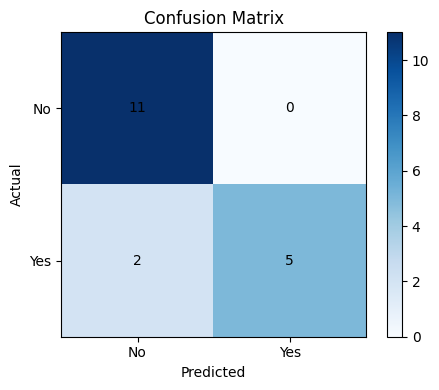

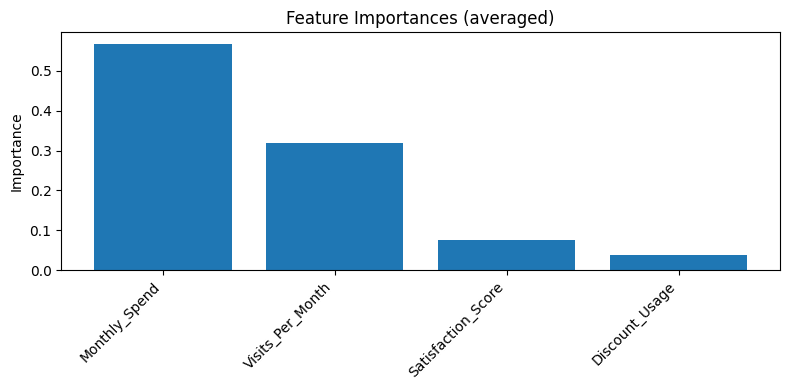

In [31]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, roc_curve, auc, classification_report

# assumes: bagging_model, X_test, y_test, y_pred, X are defined

# 1) Classification report
print(classification_report(y_test, y_pred))

# 2) Confusion matrix
cm = confusion_matrix(y_test, y_pred)
labels = np.unique(y_test)
fig, ax = plt.subplots(figsize=(5,4))
im = ax.imshow(cm, cmap='Blues')
ax.set_xticks(range(len(labels))); ax.set_yticks(range(len(labels)))
ax.set_xticklabels(labels); ax.set_yticklabels(labels)
ax.set_xlabel('Predicted'); ax.set_ylabel('Actual')
for (i, j), v in np.ndenumerate(cm):
    ax.text(j, i, int(v), ha='center', va='center', color='black')
fig.colorbar(im, ax=ax)
ax.set_title('Confusion Matrix')
plt.tight_layout()
plt.show()

# 3) Feature importances (average across base estimators)
feature_names = X.columns if hasattr(X, "columns") else [f"f{i}" for i in range(X.shape[1])]
importances = None
if hasattr(bagging_model, "feature_importances_"):
    importances = bagging_model.feature_importances_
else:
    imps = []
    for est in bagging_model.estimators_:
        if hasattr(est, "feature_importances_"):
            imps.append(est.feature_importances_)
    if imps:
        importances = np.mean(imps, axis=0)
if importances is not None:
    idx = np.argsort(importances)[::-1]
    fig, ax = plt.subplots(figsize=(8,4))
    ax.bar(np.array(feature_names)[idx], importances[idx], color='C0')
    ax.set_title('Feature Importances (averaged)')
    ax.set_ylabel('Importance')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
else:
    print("No feature_importances_ found on estimators; skipping importances plot.")
